In [3]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from turbine_regression import get_origin_data
from turbine_regression import data_sample
from turbine_regression import eturb_m1_regression_all
from turbine_regression import eturb_m2_regression_all
from turbine_regression import bturb_m1_regression_all

%matplotlib inline
# sns.set_theme(color_codes=True)
plt.style.use('seaborn-whitegrid')

# 1.汽机实时运行数据

In [6]:
df_0907 = get_origin_data(period = 3)
eturb_m2_0910 = get_origin_data(period = 5)
bturb_m1_0909 = get_origin_data(period = 4)

# eturb_m1 data
eturb_m1 = df_0907[[
    "eturb_m1_steam_flow_in",
    "eturb_m1_steam_flow_side",
    "eturb_m1_electricity_generation",
]]

# eturb_m2 data
eturb_m2 = eturb_m2_0910[[
    "eturb_m2_steam_flow_in",
    "eturb_m2_steam_flow_side",
    "eturb_m2_electricity_generation",
]]

# bturb_m1 data
bturb_m1_0907 = df_0907[[
    "bturb_m1_steam_flow_in",
    "bturb_m1_electricity_generation"
]]
bturb_m1 = pd.concat([bturb_m1_0907, bturb_m1_0909], axis = 0, sort = False)

# 2.汽机模型

In [7]:
# -------------------------
# 原始数据回归
# -------------------------
# eturb_m1
eturb_m1_result = eturb_m1_regression_all(eturb_m1, is_export_csv = 0)
print("-" * 50)
print("eturb_m1 all data regression result:\n", eturb_m1_result)

eturb_m2_result = eturb_m2_regression_all(eturb_m2, is_export_csv = 0)
print("-" * 50)
print("eturb_m2 all data regression result:\n", eturb_m2_result)

# bturb_m1
bturb_m1_result = bturb_m1_regression_all(bturb_m1_all, is_export_csv = 0)
print("-" * 50)
print("bturb_m1 all data regression result:\n", bturb_m1_result)

--------------------------------------------------
eturb_m1 all data regression result:
    eturb_m1_origin_k1  eturb_m1_origin_k2  eturb_m1_origin_b  \
0            0.172972           -0.085244          -0.329307   

   eturb_m1_origin_R2  
0             0.92412  
--------------------------------------------------
eturb_m2 all data regression result:
    eturb_m2_origin_k1  eturb_m2_origin_k2  eturb_m2_origin_b  \
0            0.182339            -0.10647          -0.313964   

   eturb_m2_origin_R2  
0            0.901649  
--------------------------------------------------
bturb_m1 all data regression result:
    bturb_m1_origin_k1  bturb_m1_origin_b  bturb_m1_origin_R2
0             0.06997           -0.91517            0.972311


# 3.数据分析

## 3.1 1# 汽机流量与发电功率散点图

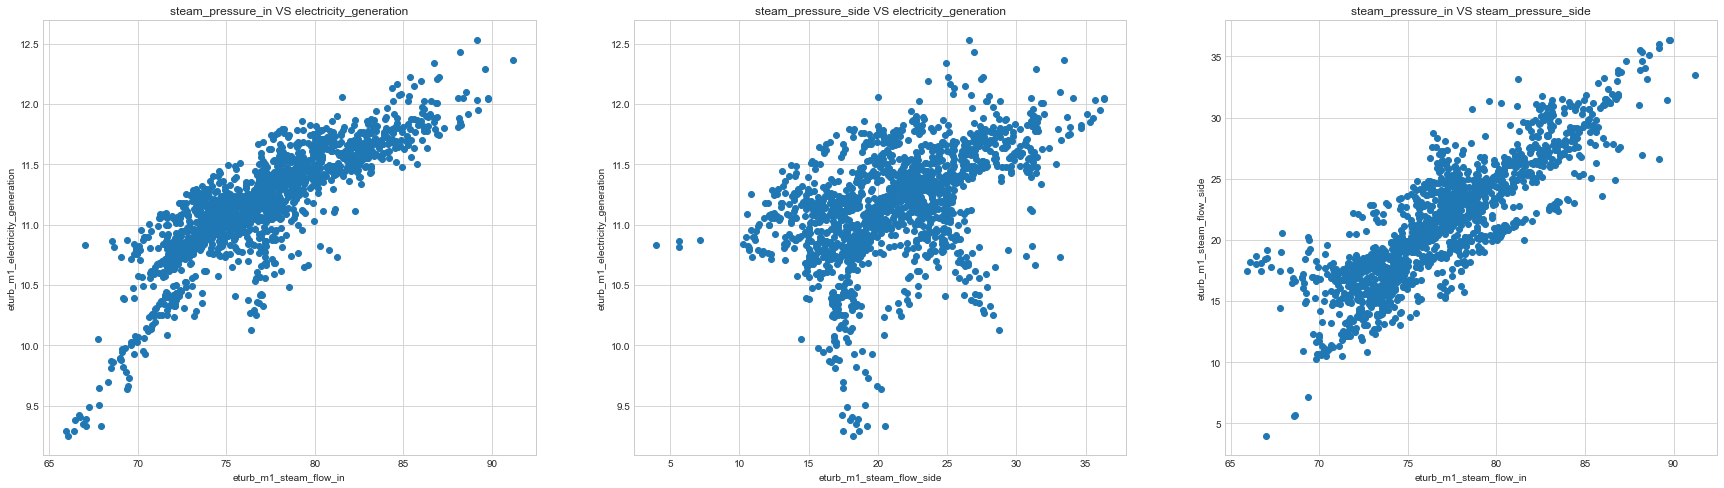

In [8]:
fig, axs = plt.subplots(figsize = (30, 8))
plt.subplot(1, 3, 1)
plt.scatter(eturb_m1["eturb_m1_steam_flow_in"], eturb_m1["eturb_m1_electricity_generation"])
plt.title("steam_pressure_in VS electricity_generation")
plt.xlabel("eturb_m1_steam_flow_in")
plt.ylabel("eturb_m1_electricity_generation")
plt.subplot(1, 3, 2)
plt.scatter(eturb_m1["eturb_m1_steam_flow_side"], eturb_m1["eturb_m1_electricity_generation"])
plt.title("steam_pressure_side VS electricity_generation")
plt.xlabel("eturb_m1_steam_flow_side")
plt.ylabel("eturb_m1_electricity_generation")
plt.subplot(1, 3, 3)
plt.scatter(eturb_m1["eturb_m1_steam_flow_in"], eturb_m1["eturb_m1_steam_flow_side"])
plt.title("steam_pressure_in VS steam_pressure_side")
plt.xlabel("eturb_m1_steam_flow_in")
plt.ylabel("eturb_m1_steam_flow_side")
plt.show()

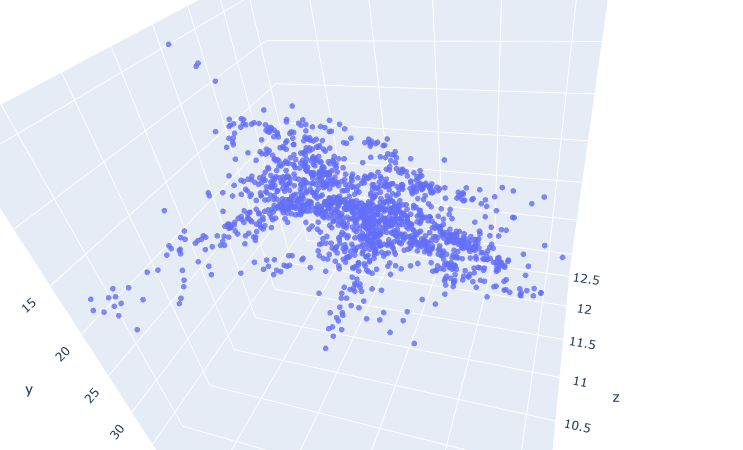

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Scatter3d(
    x = eturb_m1["eturb_m1_steam_flow_in"],
    y = eturb_m1["eturb_m1_steam_flow_side"],
    z = eturb_m1["eturb_m1_electricity_generation"],
    mode = 'markers',
    marker = dict(
        size = 3,
        # color=z,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity = 0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## 4.2 2# 汽机进汽流量与发电功率相关关系散点图

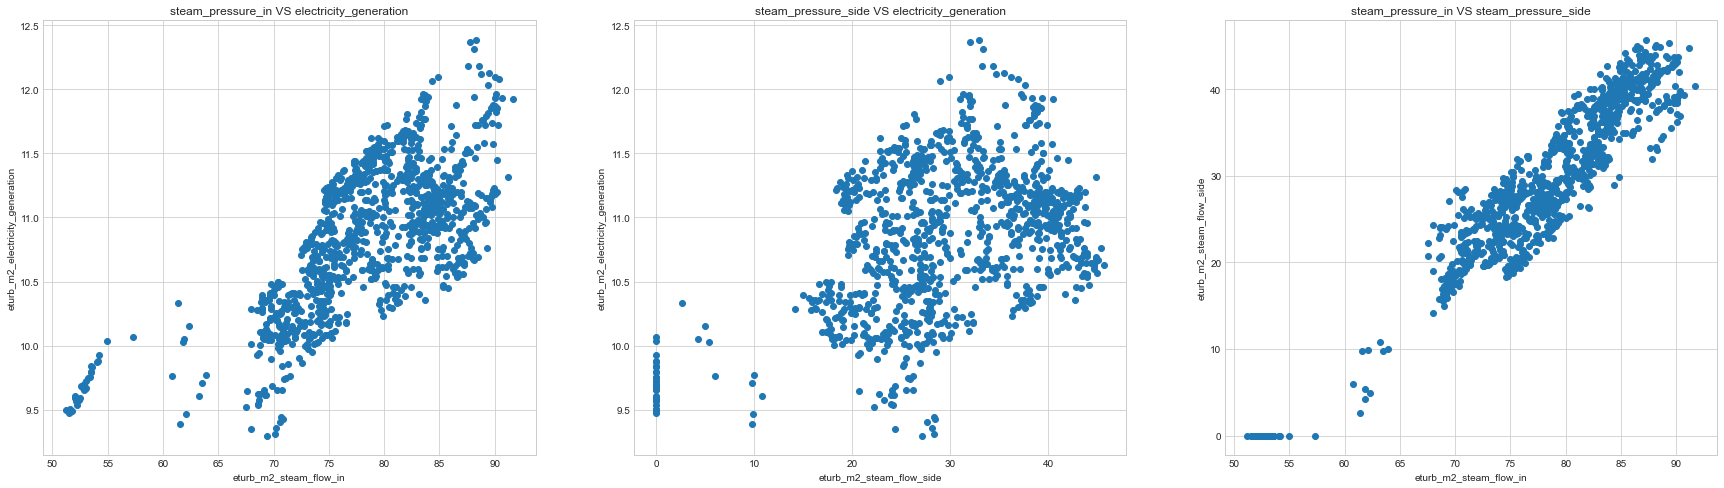

In [10]:
fig, axs = plt.subplots(figsize = (30, 8))
plt.subplot(1, 3, 1)
plt.scatter(eturb_m2["eturb_m2_steam_flow_in"], eturb_m2["eturb_m2_electricity_generation"])
plt.title("steam_pressure_in VS electricity_generation")
plt.xlabel("eturb_m2_steam_flow_in")
plt.ylabel("eturb_m2_electricity_generation")
plt.subplot(1, 3, 2)
plt.scatter(eturb_m2["eturb_m2_steam_flow_side"], eturb_m2["eturb_m2_electricity_generation"])
plt.title("steam_pressure_side VS electricity_generation")
plt.xlabel("eturb_m2_steam_flow_side")
plt.ylabel("eturb_m2_electricity_generation")
plt.subplot(1, 3, 3)
plt.scatter(eturb_m2["eturb_m2_steam_flow_in"], eturb_m2["eturb_m2_steam_flow_side"])
plt.title("steam_pressure_in VS steam_pressure_side")
plt.xlabel("eturb_m2_steam_flow_in")
plt.ylabel("eturb_m2_steam_flow_side")
plt.show()

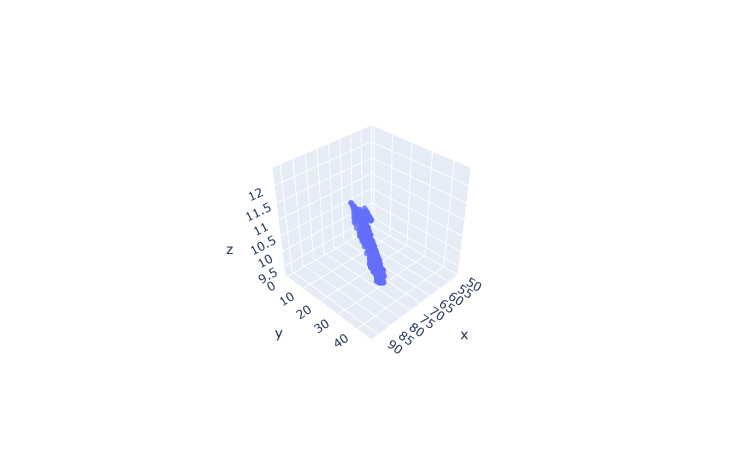

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Scatter3d(
    x = eturb_m2["eturb_m2_steam_flow_in"],
    y = eturb_m2["eturb_m2_steam_flow_side"],
    z = eturb_m2["eturb_m2_electricity_generation"],
    mode = 'markers',
    marker = dict(
        size = 3,
        # color=z,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity = 0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## 4.3 3# 汽机流量与发电功率散点图

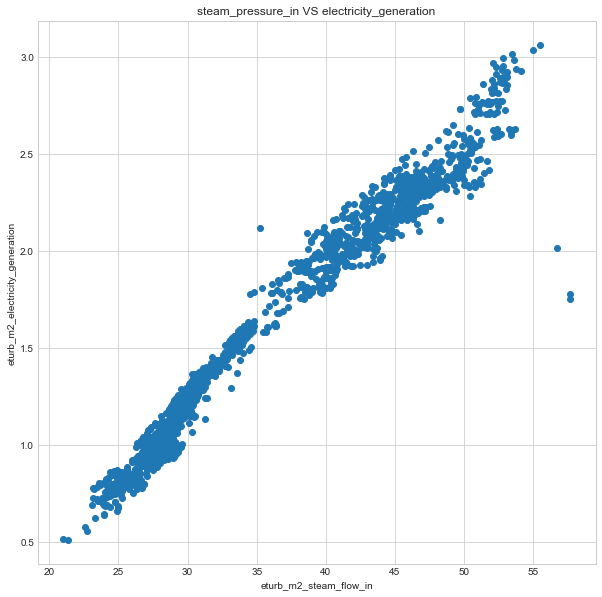

In [12]:
fig, axs = plt.subplots(figsize = (10, 10))
plt.scatter(bturb_m1["bturb_m1_steam_flow_in"], bturb_m1["bturb_m1_electricity_generation"])
plt.title("steam_pressure_in VS electricity_generation")
plt.xlabel("eturb_m2_steam_flow_in")
plt.ylabel("eturb_m2_electricity_generation")
plt.show()